Get Data on your Computer without big ckpt files:

    home/woAuchImmer/AML_project$ rsync -azP --exclude "*.ckpt" cluster:AML_project/_weights/ _weights/
    
with big ckpt files:
    
    home/woAuchImmer/AML_project$ rsync -azP cluster:AML_project/_weights/ _weights/


In [1]:
import numpy as np
import torch
import random
import json

In [2]:
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rc
import os
import ipywidgets as widgets


# latex text in plots
usetex = True
if usetex:
    rc('text', usetex=True)
else:
    rc('text', usetex=False)

#change plt parameter globally 
plt.rcParams.update({'font.size': 18,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16})

In [66]:
parent = "_weights"
#children = "resnet1111_20-09"
#children = "resnet1111_lr1e-3_20-09"
#children = "resnet1111_21-09"
#children = "resnet1111_21-09_trafo"
#children = "resnet18_orig_tr=6_09_21"
#children = "resnet50_orig_ntr_09_21"
#children = "resnet50_orig_tr=6_09_22"
#children = "resnet18_orig_tr=all_09_22"
#children = "resnet50_orig_tr6_09_22"
#children = "resnet50_orig_tr6_lr01_09_22"

path = os.path.join(parent, children)
print("Load results from ", path)

Load results from  _weights/resnet18_orig_tr=6_09_21


In [67]:
with open(path + "_net_config.json") as dict_file:
    network_config = json.load(dict_file)
print(network_config)

{'network': 'ResnetOriginal', 'optimizer': 'Adam', 'adam_regul_factor': 0.001, 'batch_size': 64, 'learning_rate': 0.01, 'loss': 'BCELoss'}


In [62]:
loss = np.load(path + "_loss.npy")
loss_val = np.load(path + "_loss_val.npy")

Total number of epochs:  18


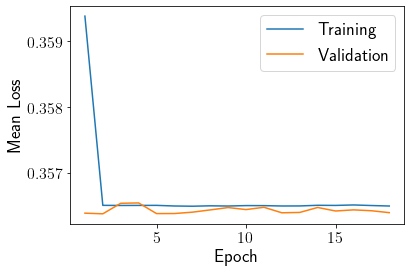

In [63]:
save_image = False
n_ep = len(loss)
epochs = np.arange(1,n_ep+1)
print("Total number of epochs: ", n_ep)
plt.figure()
plt.plot(epochs, loss, label="Training")
plt.plot(epochs, loss_val, label="Validation")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Mean Loss")

if save_image:
    plt.savefig(f"images/{widget.value}.pdf", bbox_inches='tight')
plt.show()